<a href="https://colab.research.google.com/github/DivyamNigam/weathert_type_prediction/blob/main/BUSI_651_Final_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import neighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
import itertools
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from google.colab import files
import math
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, regularizers, Input
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv('combined_2019_2020.csv')
pd.set_option('display.max_columns', None)
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Precip. Amount (mm),Precip. Amount Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,original_year
0,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 00:00,2019,5,1,00:00,8.8,NaN,0.7,NaN,57.0,NaN,NaN,NaN,30.0,NaN,4.0,NaN,24.1,NaN,100.99,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 01:00,2019,5,1,01:00,8.9,NaN,-0.3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,101.00,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019
2,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 02:00,2019,5,1,02:00,8.2,NaN,0.5,NaN,58.0,NaN,NaN,NaN,35.0,NaN,7.0,NaN,24.1,NaN,100.96,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 03:00,2019,5,1,03:00,8.1,NaN,0.3,NaN,58.0,NaN,NaN,NaN,2.0,NaN,5.0,NaN,24.1,NaN,100.96,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,-122.36,49.03,ABBOTSFORD A,1100031,2019-05-01 04:00,2019,5,1,04:00,8.2,NaN,0.6,NaN,58.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.1,NaN,100.97,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy,2019


In [ ]:
df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time (LST)', 'Year', 'Month', 'Day', 'Time (LST)', 'Temp (°C)',
       'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag',
       'Rel Hum (%)', 'Rel Hum Flag', 'Precip. Amount (mm)',
       'Precip. Amount Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather',
       'original_year'],
      dtype='object')

In [ ]:
weather_counts = df['Weather'].value_counts(dropna=False)
print(weather_counts)

Weather
NaN                                       9208
Mostly Cloudy                             1783
Rain                                      1110
Cloudy                                     991
Mainly Clear                               979
Rain Showers                               861
Clear                                      856
Fog                                        392
Rain,Fog                                   387
Moderate Rain,Fog                          133
Snow                                       130
Moderate Rain                              120
Smoke                                       98
Rain Showers,Fog                            70
Drizzle,Fog                                 65
Moderate Rain Showers                       48
Fog,Smoke                                   45
Smoke,Haze                                  37
Rain,Snow                                   37
Drizzle                                     24
Freezing Fog                                20
Rain,

In [ ]:
weather_types = ['Mostly Cloudy', 'Clear', 'Fog',
                   'Snow','Rain']
new_df = df[df['Weather'].isin(weather_types)].groupby('Weather').head(130)


In [ ]:
new_df.drop([
    'Temp Flag', 'Dew Point Temp Flag', 'Rel Hum Flag',
    'Precip. Amount (mm)', 'Precip. Amount Flag', 'Wind Dir Flag',
    'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill Flag','Visibility Flag','Wind Spd Flag','Date/Time (LST)','Climate ID','Station Name','Longitude (x)','Latitude (y)','original_year','Year'], axis=1, inplace=True)
print(new_df.shape)
new_df.head()

(650, 12)


,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather
1,5,1,01:00,8.9,-0.3,52.0,NaN,0.0,24.1,101.00,NaN,Mostly Cloudy
4,5,1,04:00,8.2,0.6,58.0,NaN,0.0,24.1,100.97,NaN,Mostly Cloudy
7,5,1,07:00,9.0,2.1,62.0,9.0,9.0,48.3,101.01,NaN,Mostly Cloudy
10,5,1,10:00,13.9,1.9,44.0,19.0,23.0,48.3,101.01,NaN,Mostly Cloudy
22,5,1,22:00,9.8,3.5,65.0,19.0,16.0,24.1,100.88,NaN,Mostly Cloudy


In [ ]:
new_df['Wind Chill'] = new_df['Wind Chill'].fillna(0)
new_df['Wind Dir (10s deg)'] = new_df['Wind Dir (10s deg)'].fillna(0)
new_df['Wind Spd (km/h)'] = new_df['Wind Spd (km/h)'].fillna(0)
new_df.dropna(inplace=True)

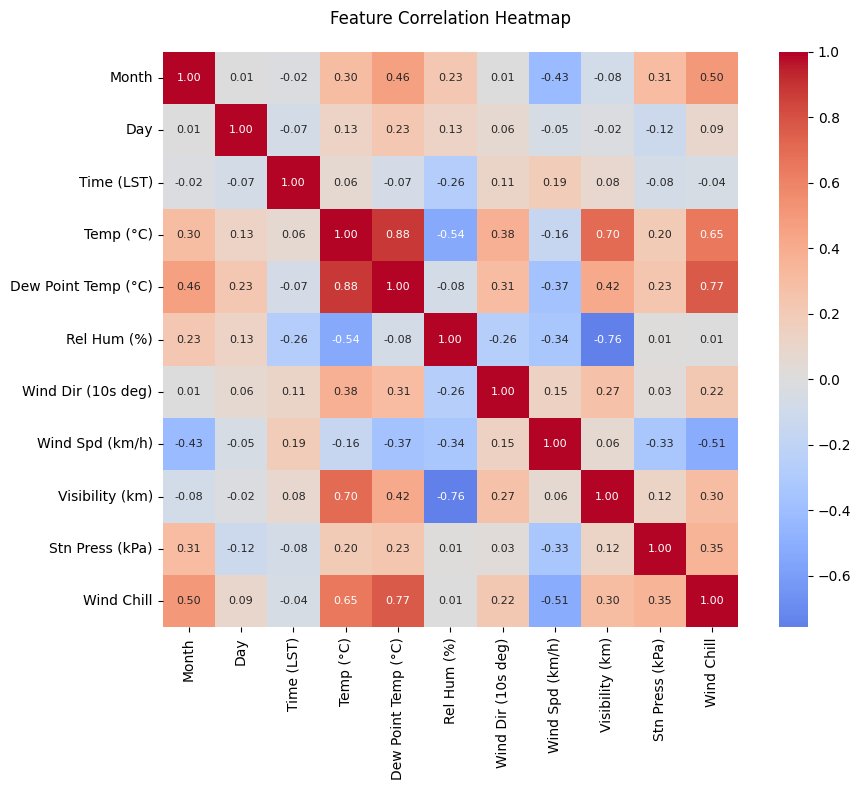


Highly correlated feature pairs (|correlation| > 0.8):
Dew Point Temp (°C) & Temp (°C): 0.878


In [ ]:
def create_features_correlation_heatmap(df, figsize=(10,8)):
    # Create a copy to avoid modifying the original DataFrame
    features = df.drop('Weather', axis=1).copy()

    # Function to convert time string to hours
    def time_to_hours(time_str):
        try:
            # Check if the value is already numeric
            if pd.api.types.is_numeric_dtype(type(time_str)):
                return time_str

            # Convert time string (HH:MM) to hours
            hours, minutes = map(int, time_str.split(':'))
            return hours + minutes/60
        except:
            return np.nan

    # Convert time columns to numeric (hours)
    for col in features.columns:
        # Check if column contains time strings
        if features[col].dtype == 'object' and ':' in str(features[col].iloc[0]):
            features[col] = features[col].apply(time_to_hours)

    # Drop any non-numeric columns
    numeric_features = features.select_dtypes(include=[np.number])

    # Create figure
    plt.figure(figsize=figsize)

    # Create correlation heatmap
    sns.heatmap(numeric_features.corr(),
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True,
                annot_kws={"size": 8})

    plt.title('Feature Correlation Heatmap', pad=20)
    plt.xticks(rotation=90)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print highly correlated feature pairs
    print("\nHighly correlated feature pairs (|correlation| > 0.8):")
    corr_matrix = numeric_features.corr().abs()

    # Get upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index pairs of high correlations
    high_corr_pairs = [(i, j, corr_matrix.loc[i,j])
                       for i in corr_matrix.index
                       for j in corr_matrix.columns
                       if corr_matrix.loc[i,j] > 0.8 and i < j]

    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} & {feat2}: {corr:.3f}")

create_features_correlation_heatmap(new_df)

In [ ]:
new_df.shape

(649, 12)

In [ ]:
df_exploded = new_df.explode('Weather')
one_hot_encoded = pd.get_dummies(df_exploded['Weather']).astype(int)
df_combined = pd.concat([new_df, one_hot_encoded], axis=1)
df_combined['hour'] = pd.to_datetime(df_combined['Time (LST)'], format='%H:%M').dt.hour
df_combined.drop('Time (LST)', axis=1, inplace=True)
df_combined.head()

,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Weather,Clear,Fog,Mostly Cloudy,Rain,Snow,hour
1,5,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,Mostly Cloudy,0,0,1,0,0,1
4,5,1,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,Mostly Cloudy,0,0,1,0,0,4
7,5,1,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,Mostly Cloudy,0,0,1,0,0,7
10,5,1,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,Mostly Cloudy,0,0,1,0,0,10
22,5,1,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,Mostly Cloudy,0,0,1,0,0,22


In [ ]:
df_combined.drop('Weather', axis=1, inplace=True)
df_combined.insert(2, 'hour', df_combined.pop('hour'))

In [ ]:
df_combined.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Clear,Fog,Mostly Cloudy,Rain,Snow
1,5,1,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0,0,1,0,0
4,5,1,4,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0,0,1,0,0
7,5,1,7,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,0,0,1,0,0
10,5,1,10,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,0,0,1,0,0
22,5,1,22,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,0,0,1,0,0


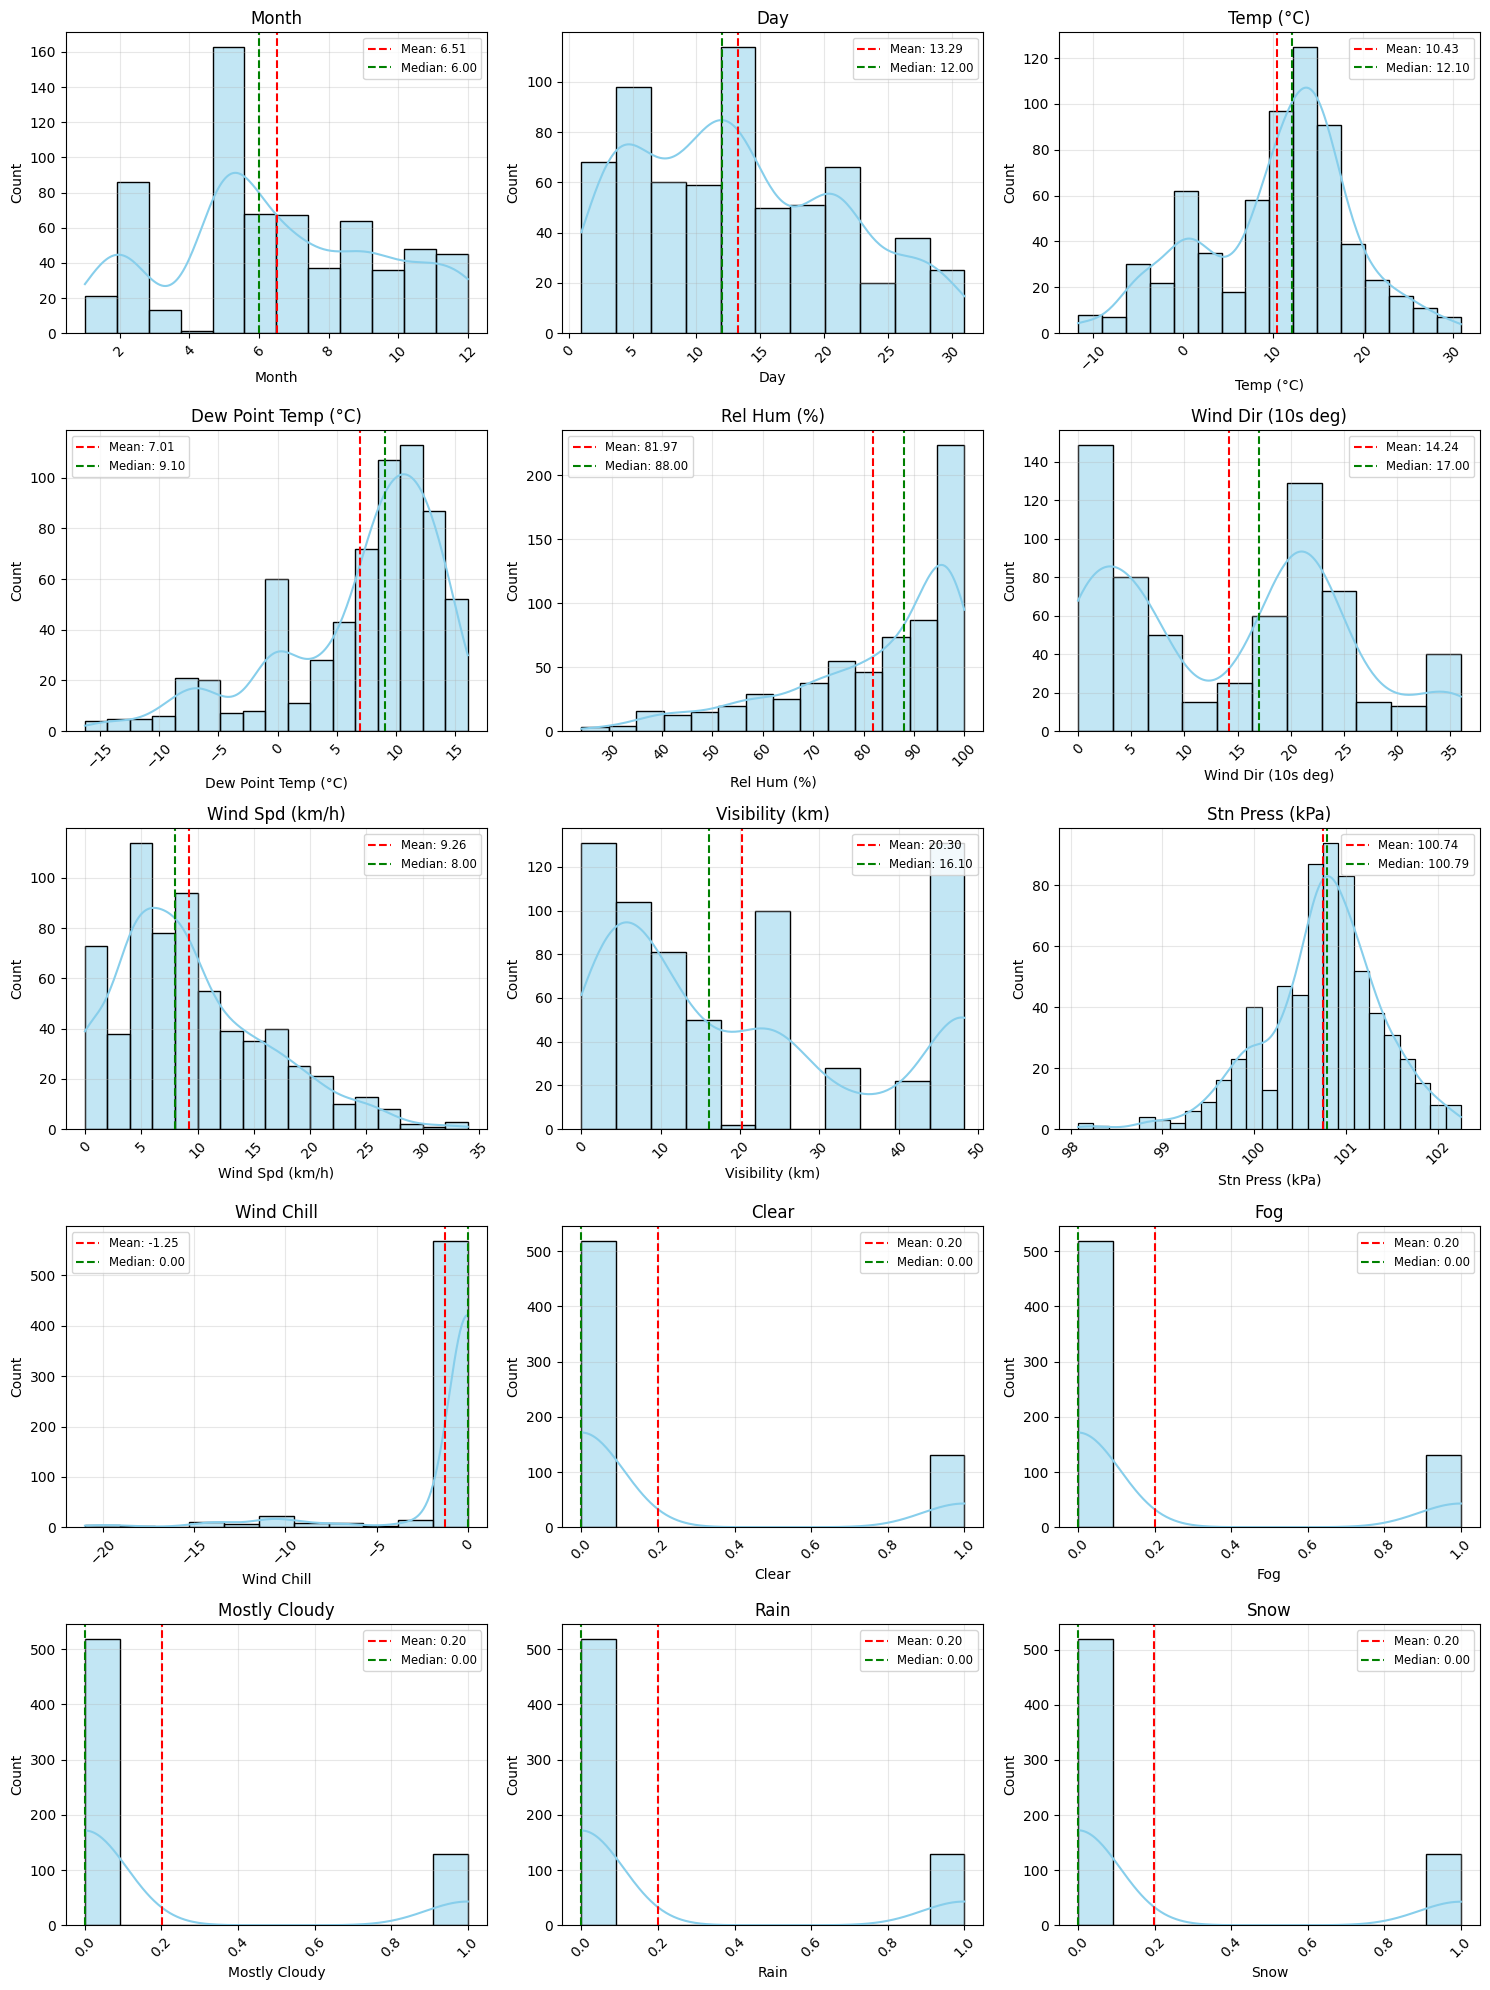


Summary Statistics:
            Month         Day        hour   Temp (°C)  Dew Point Temp (°C)  \
count  649.000000  649.000000  649.000000  649.000000           649.000000   
mean     6.514638   13.291217   10.975347   10.426656             7.007242   
std      3.093230    7.961322    7.299755    8.310954             6.800760   
min      1.000000    1.000000    0.000000  -11.700000           -16.300000   
25%      5.000000    6.000000    4.000000    4.000000             3.300000   
50%      6.000000   12.000000   10.000000   12.100000             9.100000   
75%      9.000000   20.000000   18.000000   15.700000            11.800000   
max     12.000000   31.000000   23.000000   30.900000            16.100000   

       Rel Hum (%)  Wind Dir (10s deg)  Wind Spd (km/h)  Visibility (km)  \
count   649.000000          649.000000       649.000000       649.000000   
mean     81.970724           14.240370         9.255778        20.300924   
std      17.420031           10.609111         6

In [ ]:
def plot_distributions(df, figsize=(15, 4)):
    # Get numerical columns only
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Calculate number of rows needed (3 plots per row)
    n_cols = 3
    n_rows = int(np.ceil(len(numerical_cols) / n_cols))

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    # Plot each distribution
    for idx, col in enumerate(numerical_cols):
        # Create distribution plot
        sns.histplot(data=df[col], kde=True, ax=axes[idx], color='skyblue')

        # Calculate statistics
        mean_val = df[col].mean()
        median_val = df[col].median()

        # Add mean and median lines
        axes[idx].axvline(mean_val, color='red', linestyle='--',
                         label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--',
                         label=f'Median: {median_val:.2f}')

        # Customize plot
        axes[idx].set_title(col)
        axes[idx].legend(fontsize='small')
        axes[idx].grid(True, alpha=0.3)

        # Rotate x-axis labels if they're too long
        axes[idx].tick_params(axis='x', rotation=45)

    # Remove empty subplots if any
    for idx in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[idx])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

# Call the function
plot_distributions(df_combined)

# **Data Engineering**

In [ ]:
df_combined['Sin_Wind_Spd'] = np.sin(df_combined['Wind Spd (km/h)'] + 1)
df_combined['Sin_Wind_chill'] = np.sin(df_combined['Wind Chill'] + 1)
df_combined.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Clear,Fog,Mostly Cloudy,Rain,Snow,Sin_Wind_Spd,Sin_Wind_chill
1,5,1,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0,0,1,0,0,0.841471,0.841471
4,5,1,4,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0,0,1,0,0,0.841471,0.841471
7,5,1,7,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,0,0,1,0,0,-0.544021,0.841471
10,5,1,10,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,0,0,1,0,0,-0.905578,0.841471
22,5,1,22,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,0,0,1,0,0,-0.961397,0.841471


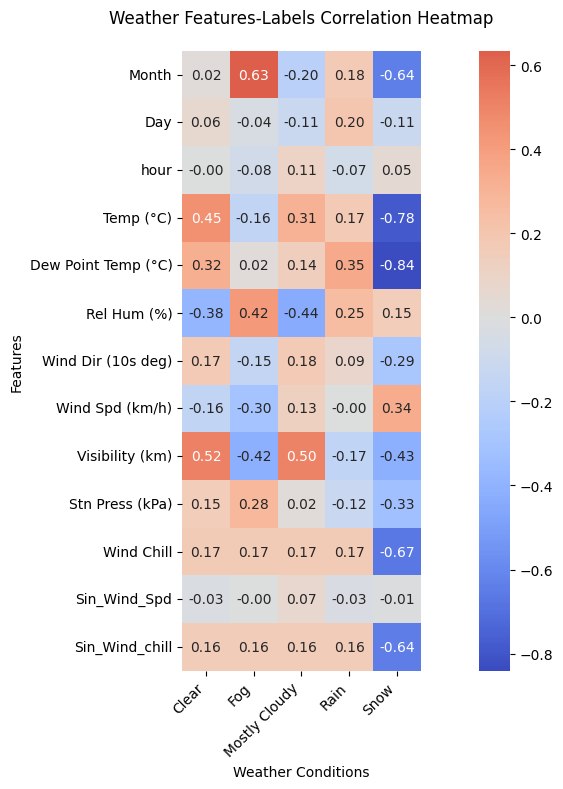


Strongest correlations for each weather condition:

Clear:
  Visibility (km): 0.516
  Temp (°C): 0.452
  Rel Hum (%): 0.381

Fog:
  Month: 0.634
  Visibility (km): 0.424
  Rel Hum (%): 0.420

Mostly Cloudy:
  Visibility (km): 0.502
  Rel Hum (%): 0.442
  Temp (°C): 0.309

Rain:
  Dew Point Temp (°C): 0.350
  Rel Hum (%): 0.250
  Day: 0.198

Snow:
  Dew Point Temp (°C): 0.841
  Temp (°C): 0.779
  Wind Chill: 0.668


In [ ]:
def create_weather_correlation_heatmap(df, figsize=(12, 8)):

    # Separate features and labels
    features = ['Month', 'Day', 'hour', 'Temp (°C)', 'Dew Point Temp (°C)',
       'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Wind Chill','Sin_Wind_Spd','Sin_Wind_chill']

    labels = ['Clear', 'Fog','Mostly Cloudy', 'Rain', 'Snow']

    # Calculate correlations between features and labels
    correlations = pd.DataFrame(index=features)

    for label in labels:
        correlations[label] = [df[feature].corr(df[label]) for feature in features]

    # Create figure
    plt.figure(figsize=figsize)

    # Create heatmap
    sns.heatmap(correlations,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                square=True)

    plt.title('Weather Features-Labels Correlation Heatmap', pad=20)
    plt.ylabel('Features')
    plt.xlabel('Weather Conditions')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print strongest correlations for each weather condition
    print("\nStrongest correlations for each weather condition:")
    for label in labels:
        strongest_corr = correlations[label].abs().nlargest(3)
        print(f"\n{label}:")
        for feat, corr in strongest_corr.items():
            print(f"  {feat}: {corr:.3f}")

# Example usage:
create_weather_correlation_heatmap(df_combined)

In [ ]:
# List of weather columns exactly as they appear in your DataFrame
weather_columns = ['Fog', 'Snow', 'Mostly Cloudy',  'Clear','Rain']

# Create y (target) DataFrame
y = df_combined[weather_columns].copy()

# Remove weather columns from original DataFrame
df_cleaned = df_combined.drop(columns=weather_columns)
scaler = StandardScaler()
df_cleaned = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
df_cleaned.drop(['Day','hour'], axis=1, inplace=True)
df_cleaned.head()

,Month,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Sin_Wind_Spd,Sin_Wind_chill
0,-0.49004,-0.183834,-1.075303,-1.721802,-1.343313,-1.382981,0.222787,0.403199,0.332737,1.120395,0.319039
1,-0.49004,-0.268125,-0.942863,-1.377105,-1.343313,-1.382981,0.222787,0.355937,0.332737,1.120395,0.319039
2,-0.49004,-0.171792,-0.722129,-1.147307,-0.494331,-0.038218,1.641937,0.418953,0.332737,-0.753823,0.319039
3,-0.49004,0.418246,-0.751560,-2.181397,0.448982,2.053636,1.641937,0.418953,0.332737,-1.242917,0.319039
4,-0.49004,-0.075459,-0.516111,-0.974959,0.448982,1.007709,0.222787,0.214150,0.332737,-1.318426,0.319039


In [ ]:
y.head()

,Fog,Snow,Mostly Cloudy,Clear,Rain
1,0,0,1,0,0
4,0,0,1,0,0
7,0,0,1,0,0
10,0,0,1,0,0
22,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size=0.2, random_state=42)

In [ ]:
# Count the number of 1s in each column
count_of_ones = y_train.sum()

print("Count of 1s in each column:")
print(count_of_ones)


Count of 1s in each column:
Fog              107
Snow             103
Mostly Cloudy    105
Clear            104
Rain             100
dtype: int64


In [ ]:
X_train.columns

Index(['Month', 'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Visibility (km)',
       'Stn Press (kPa)', 'Wind Chill', 'Sin_Wind_Spd', 'Sin_Wind_chill'],
      dtype='object')

# **Neural Network**

In [ ]:
seed_value = 33
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
tf.keras.utils.set_random_seed(seed_value)
tf.config.experimental.enable_op_determinism()

model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='swish',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(64, activation='linear',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)),
    tf.keras.layers.Dense(5, activation='softmax',
                          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value))
])
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        tf.keras.metrics.Precision(name='precision', top_k=1),
        tf.keras.metrics.Recall(name='recall', top_k=1)
    ]
)

history=model_train3 = model3.fit(
    X_train,
    y_train,
    epochs=200 ,batch_size = 32,
    validation_split=0.2
)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - categorical_accuracy: 0.4932 - loss: 1.4382 - precision: 0.4932 - recall: 0.4932 - val_categorical_accuracy: 0.6731 - val_loss: 1.2301 - val_precision: 0.6731 - val_recall: 0.6731
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.7214 - loss: 1.1116 - precision: 0.7214 - recall: 0.7214 - val_categorical_accuracy: 0.7115 - val_loss: 1.0208 - val_precision: 0.7115 - val_recall: 0.7115
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.7589 - loss: 0.9192 - precision: 0.7589 - recall: 0.7589 - val_categorical_accuracy: 0.7212 - val_loss: 0.8849 - val_precision: 0.7212 - val_recall: 0.7212
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.7746 - loss: 0.7948 - precision: 0.7746 - recall: 0.7746 - val_categorical_accuracy: 0.7019 - val_loss: 0.7920 - val_precision: 0.7019 - val_recall: 0.7019
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_ac

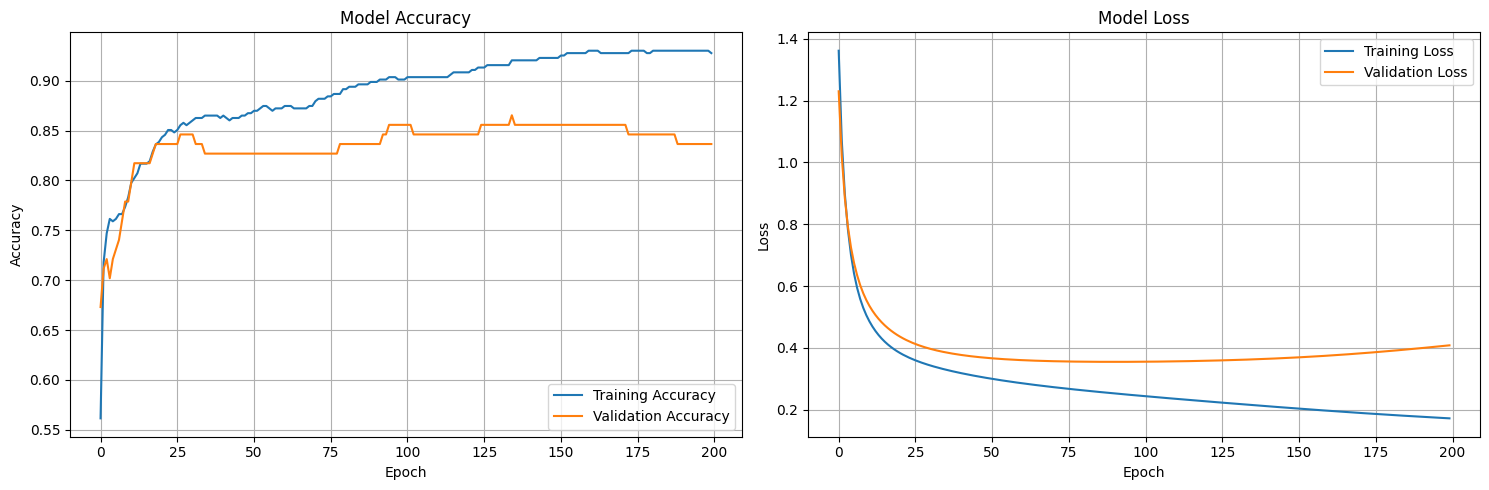

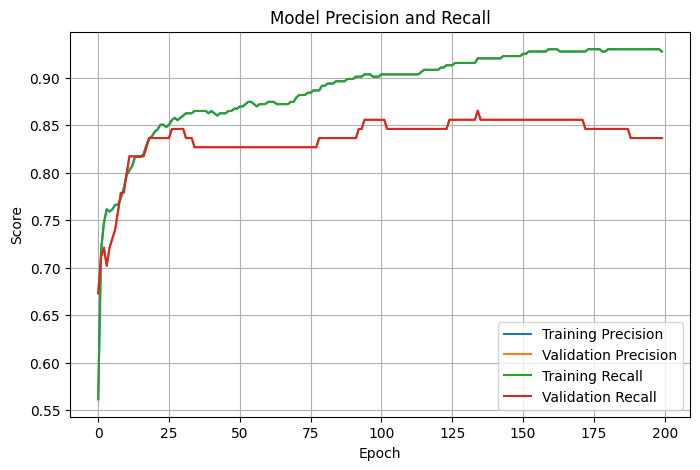

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation accuracy
    ax1.plot(history.history['categorical_accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')
    ax1.grid(True)

    # Plot training & validation loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Plot precision and recall
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Precision and Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Call the function with your training history
plot_training_history(history)

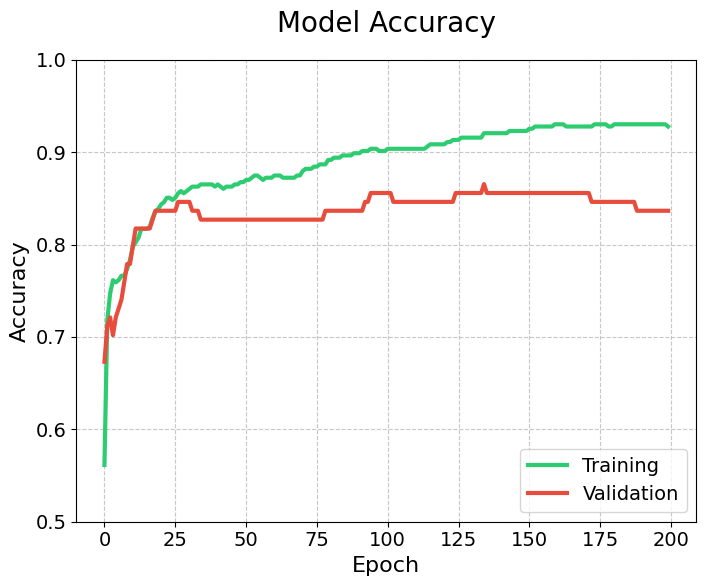

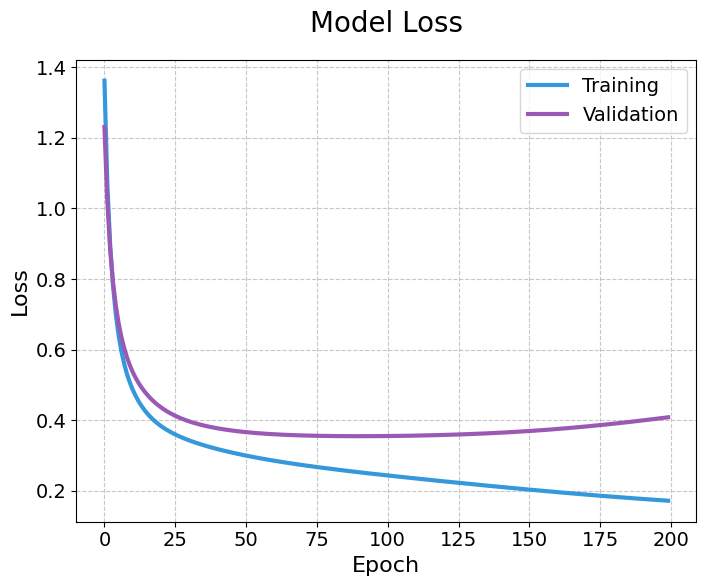

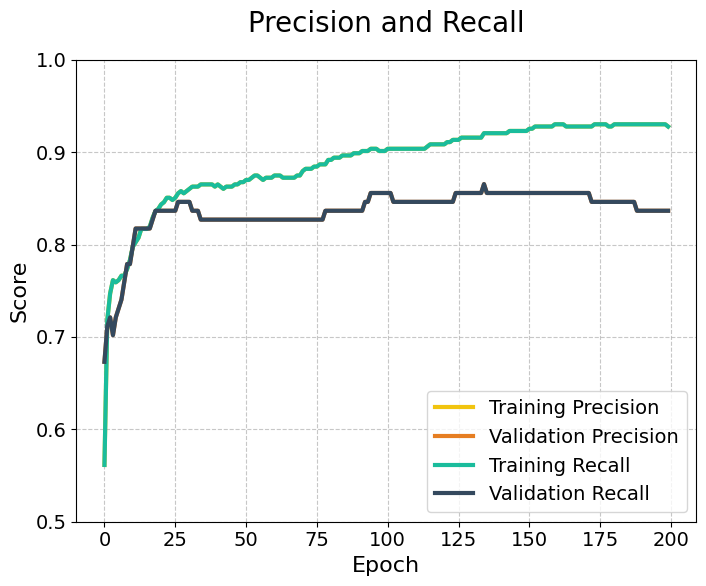

In [ ]:
def plot_model_metrics(history):
    # Create separate figures for each metric
    plt.figure(figsize=(8, 6))

    # Plot Accuracy
    plt.plot(history.history['categorical_accuracy'],
             label='Training',
             linewidth=3,
             color='#2ecc71')
    plt.plot(history.history['val_categorical_accuracy'],
             label='Validation',
             linewidth=3,
             color='#e74c3c')

    plt.title('Model Accuracy', fontsize=20, pad=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.legend(fontsize=14, loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(labelsize=14)
    plt.ylim(0.5, 1.0)
    plt.show()

    # Plot Loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'],
             label='Training',
             linewidth=3,
             color='#3498db')
    plt.plot(history.history['val_loss'],
             label='Validation',
             linewidth=3,
             color='#9b59b6')

    plt.title('Model Loss', fontsize=20, pad=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(fontsize=14, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(labelsize=14)
    plt.show()

    # Plot Precision and Recall
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['precision'],
             label='Training Precision',
             linewidth=3,
             color='#f1c40f')
    plt.plot(history.history['val_precision'],
             label='Validation Precision',
             linewidth=3,
             color='#e67e22')
    plt.plot(history.history['recall'],
             label='Training Recall',
             linewidth=3,
             color='#1abc9c')
    plt.plot(history.history['val_recall'],
             label='Validation Recall',
             linewidth=3,
             color='#34495e')

    plt.title('Precision and Recall', fontsize=20, pad=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Score', fontsize=16)
    plt.legend(fontsize=14, loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tick_params(labelsize=14)
    plt.ylim(0.5, 1.0)
    plt.show()

plot_model_metrics(model_train3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Model Evaluation Metrics:
Accuracy: 0.8769
Precision: 0.8846
Recall: 0.8769
F1 Score: 0.8791


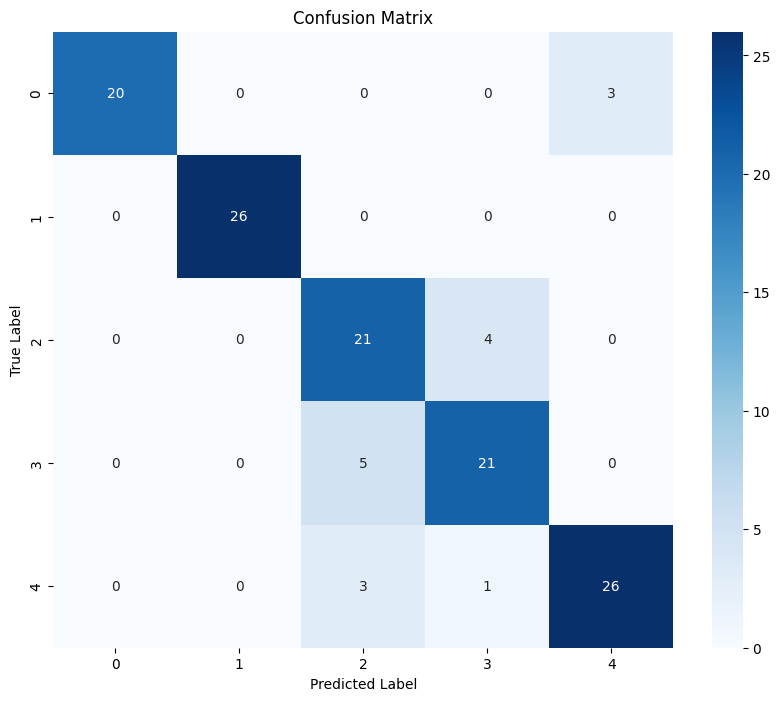

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get predictions
y_pred_proba3 = model3.predict(X_test)
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_proba3, axis=1)

# Convert one-hot encoded test labels back to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy3 = accuracy_score(y_test_classes, y_pred_classes)
precision3 = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall3 = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1_3 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}")

# Optional: Print confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Final Accuracy Values:
Training Accuracy: 0.9277
Validation Accuracy: 0.8365
Test Accuracy: 0.8769


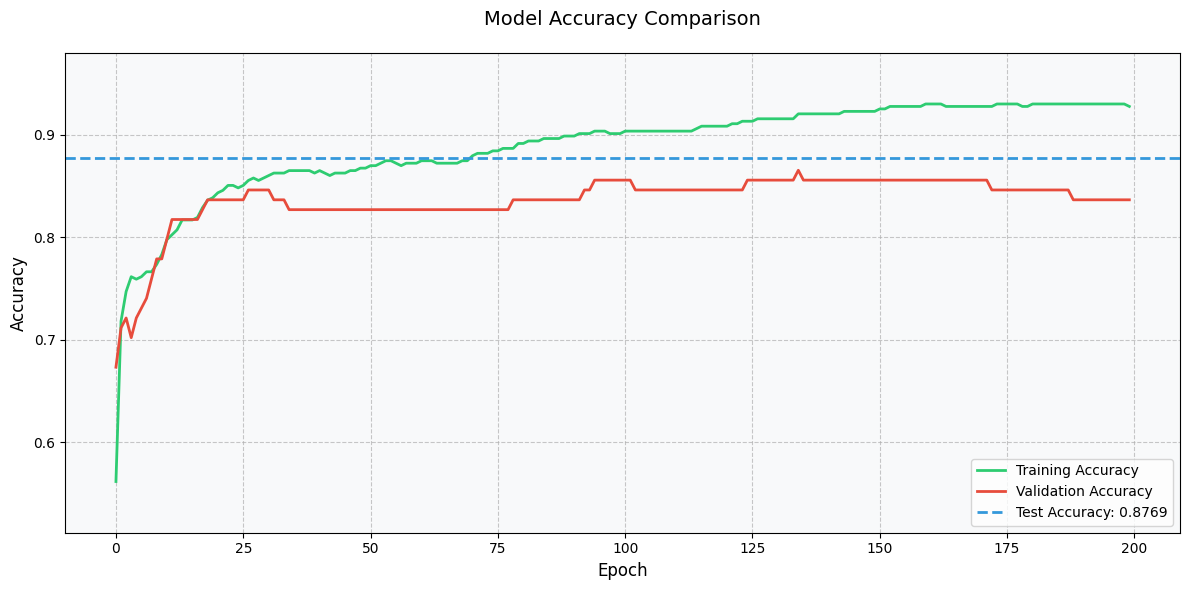

In [ ]:
import matplotlib.pyplot as plt

# Get the test accuracy from our previous evaluation
test_accuracy = accuracy3

# Create the accuracy plot
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.plot(history.history['categorical_accuracy'],
         label='Training Accuracy',
         color='#2ecc71',
         linewidth=2)
plt.plot(history.history['val_categorical_accuracy'],
         label='Validation Accuracy',
         color='#e74c3c',
         linewidth=2)

# Add test accuracy as a horizontal line
plt.axhline(y=test_accuracy,
           color='#3498db',
           linestyle='--',
           label=f'Test Accuracy: {test_accuracy:.4f}',
           linewidth=2)

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)

# Set y-axis limits with some padding
plt.ylim(min(min(history.history['categorical_accuracy']),
             min(history.history['val_categorical_accuracy']),
             test_accuracy) - 0.05,
         max(max(history.history['categorical_accuracy']),
             max(history.history['val_categorical_accuracy']),
             test_accuracy) + 0.05)

# Add background grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f8f9fa')

# Print final accuracy values
print("\nFinal Accuracy Values:")
print(f"Training Accuracy: {history.history['categorical_accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_categorical_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.tight_layout()
plt.show()

# **Random Forest**

In [ ]:
y_test3_class_labels = np.argmax(y_test.values, axis=1)
y_train3_class_labels = np.argmax(y_train.values, axis=1)
# Train the RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators= 45, random_state=42)
modelRF.fit(X_train, y_train3_class_labels)

# Make predictions on the test set
y_pred_rf = modelRF.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test3_class_labels, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 86.15%


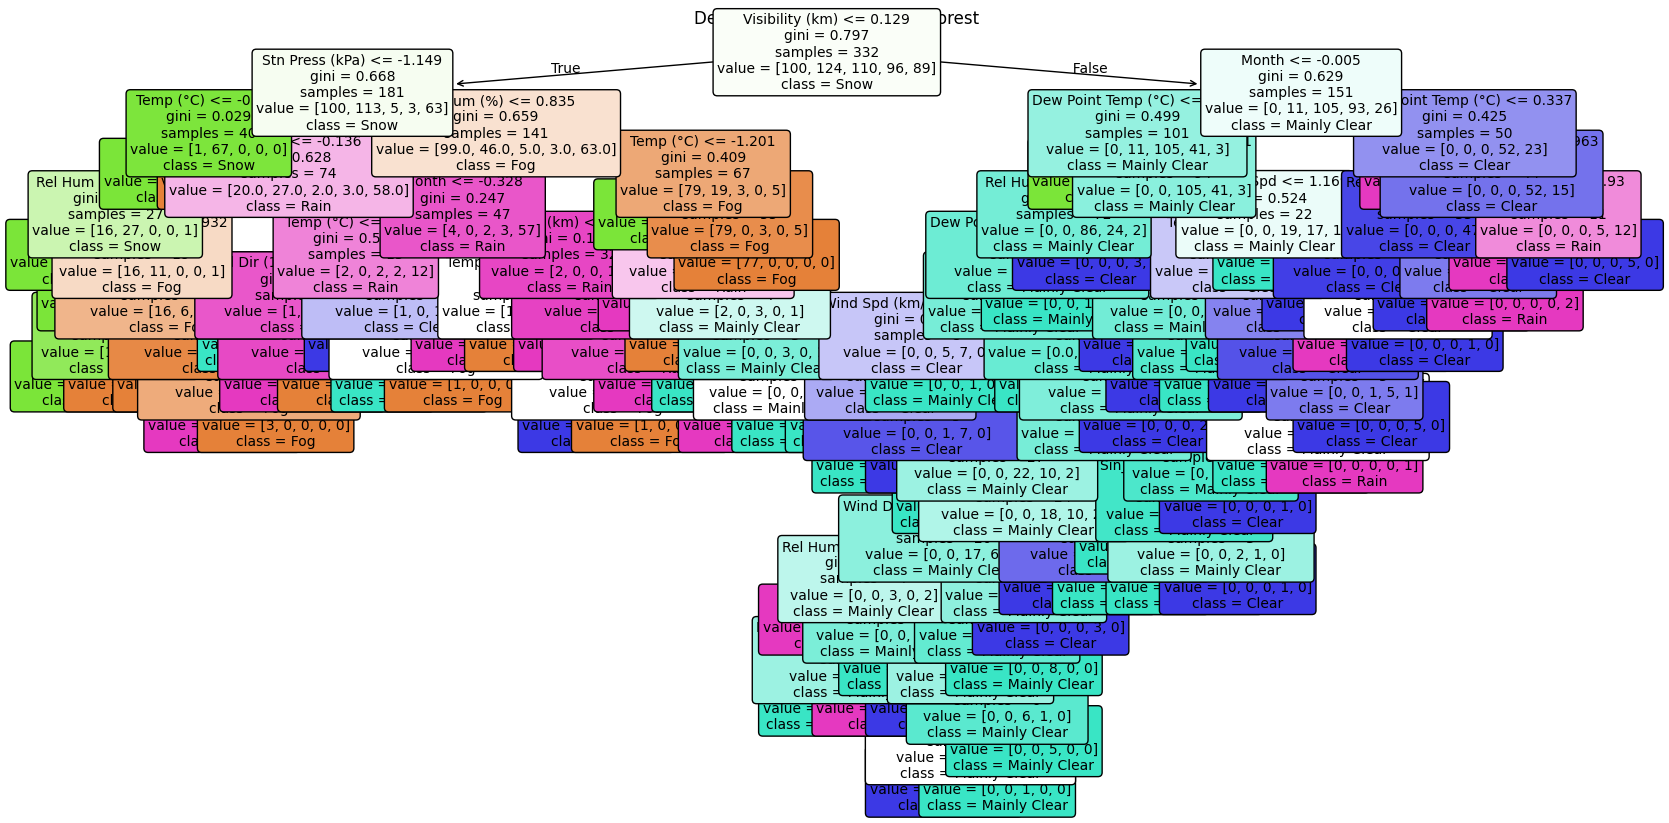

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree from the Random Forest
tree = modelRF.estimators_[0]  # Get the first tree in the forest

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X_train.columns,  # Replace with the column names of X_train
    class_names=['Fog', 'Snow', 'Mainly Clear', 'Clear', 'Rain'],  # Update with class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Calculate metrics
accuracy_rf = accuracy_score(y_test3_class_labels, y_pred_rf)
precision_rf = precision_score(y_test3_class_labels, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test3_class_labels, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test3_class_labels, y_pred_rf, average='weighted')

# Print metrics
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-score: {f1_rf:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test3_class_labels, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test3_class_labels, y_pred_rf))


Random Forest Accuracy: 86.15%
Random Forest Precision: 0.86
Random Forest Recall: 0.86
Random Forest F1-score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.96      1.00      0.98        26
           2       0.77      0.80      0.78        25
           3       0.77      0.77      0.77        26
           4       0.87      0.90      0.89        30

    accuracy                           0.86       130
   macro avg       0.86      0.86      0.86       130
weighted avg       0.86      0.86      0.86       130

Confusion Matrix:
[[19  1  0  0  3]
 [ 0 26  0  0  0]
 [ 0  0 20  4  1]
 [ 0  0  6 20  0]
 [ 1  0  0  2 27]]


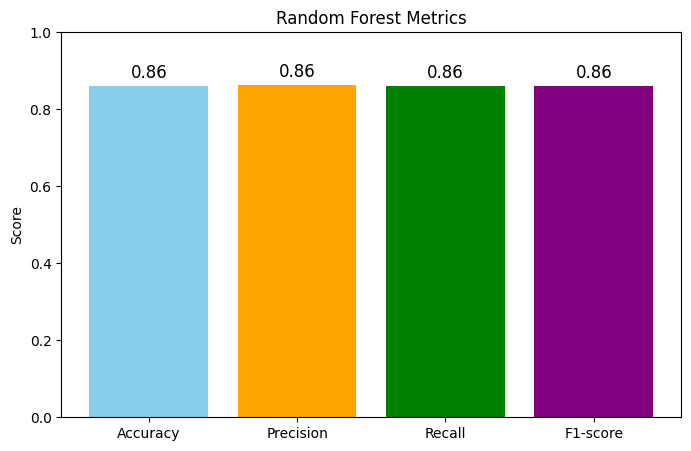

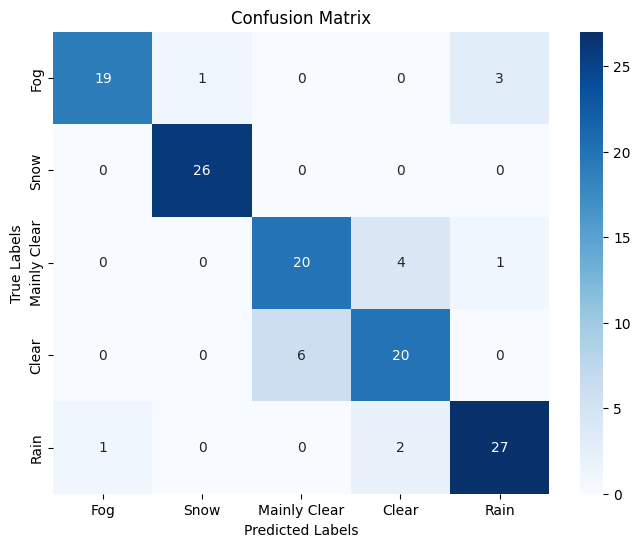

In [ ]:
import numpy as np
import seaborn as sns

# Metrics data
metrics = {
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-score": f1_rf
}

# Plot Metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Random Forest Metrics")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test3_class_labels, y_pred_rf)
labels = ['Fog', 'Snow', 'Mainly Clear', 'Clear', 'Rain']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **GradientBoostingClassifier**

In [ ]:
y_test3_class_labels = np.argmax(y_test.values, axis=1)
# Train the GradientBoostingClassifier
modelGBC = GradientBoostingClassifier(n_estimators=45, random_state=42)
modelGBC.fit(X_train, y_train3_class_labels)
y_pred = modelGBC.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test3_class_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.92%


GBC Accuracy: 86.92%
GBC Precision: 0.87
GBC Recall: 0.87
GBC F1-score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.96      1.00      0.98        26
           2       0.76      0.76      0.76        25
           3       0.81      0.81      0.81        26
           4       0.90      0.90      0.90        30

    accuracy                           0.87       130
   macro avg       0.87      0.87      0.87       130
weighted avg       0.87      0.87      0.87       130

Confusion Matrix:
[[20  1  0  0  2]
 [ 0 26  0  0  0]
 [ 0  0 19  5  1]
 [ 0  0  5 21  0]
 [ 2  0  1  0 27]]


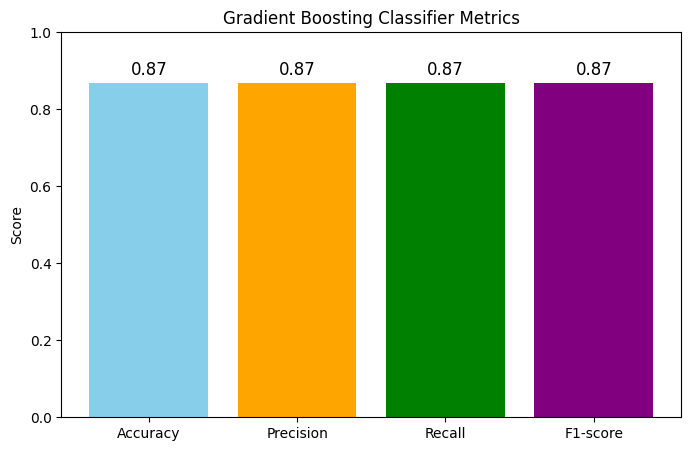

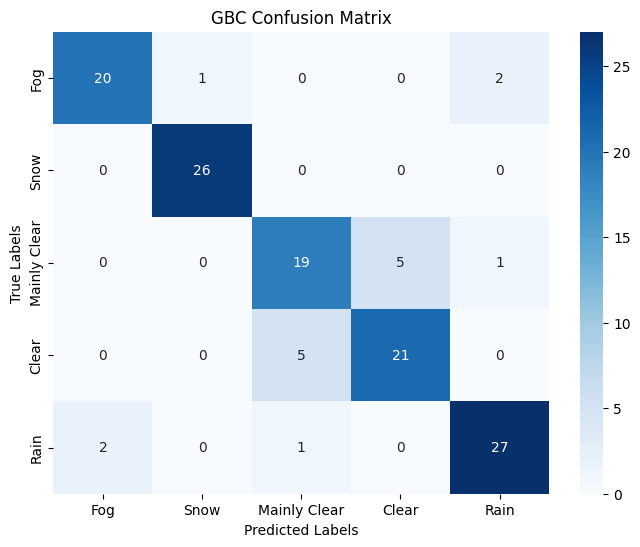

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate additional metrics
precision_gbc = precision_score(y_test3_class_labels, y_pred, average='weighted')
recall_gbc = recall_score(y_test3_class_labels, y_pred, average='weighted')
f1_gbc = f1_score(y_test3_class_labels, y_pred, average='weighted')

# Print metrics
print(f"GBC Accuracy: {accuracy * 100:.2f}%")
print(f"GBC Precision: {precision_gbc:.2f}")
print(f"GBC Recall: {recall_gbc:.2f}")
print(f"GBC F1-score: {f1_gbc:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test3_class_labels, y_pred))

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test3_class_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix_gbc)

# Plot Metrics
metrics_gbc = {
    "Accuracy": accuracy,
    "Precision": precision_gbc,
    "Recall": recall_gbc,
    "F1-score": f1_gbc
}

# Bar Plot for Metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_gbc.keys(), metrics_gbc.values(), color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Gradient Boosting Classifier Metrics")
for i, v in enumerate(metrics_gbc.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Heatmap for Confusion Matrix
labels = ['Fog', 'Snow', 'Mainly Clear', 'Clear', 'Rain']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("GBC Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC

modelSVM = SVC(kernel='linear', random_state=42)
modelSVM.fit(X_train, y_train3_class_labels)

y_pred_svm = modelSVM.predict(X_test)
accuracy_svm = accuracy_score(y_test3_class_labels, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


SVM Accuracy: 83.08%


SVM Accuracy: 83.08%
SVM Precision: 0.85
SVM Recall: 0.83
SVM F1-score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       1.00      1.00      1.00        26
           2       0.66      0.92      0.77        25
           3       0.83      0.58      0.68        26
           4       0.81      0.83      0.82        30

    accuracy                           0.83       130
   macro avg       0.85      0.83      0.83       130
weighted avg       0.85      0.83      0.83       130

Confusion Matrix:
[[19  0  0  0  4]
 [ 0 26  0  0  0]
 [ 0  0 23  2  0]
 [ 0  0  9 15  2]
 [ 1  0  3  1 25]]


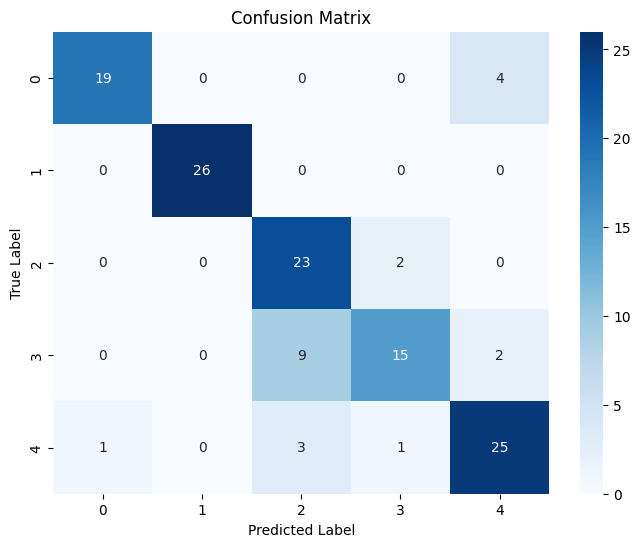

<ipython-input-136-2c891b81bb4d>:61: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test3_class_labels, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test Data')


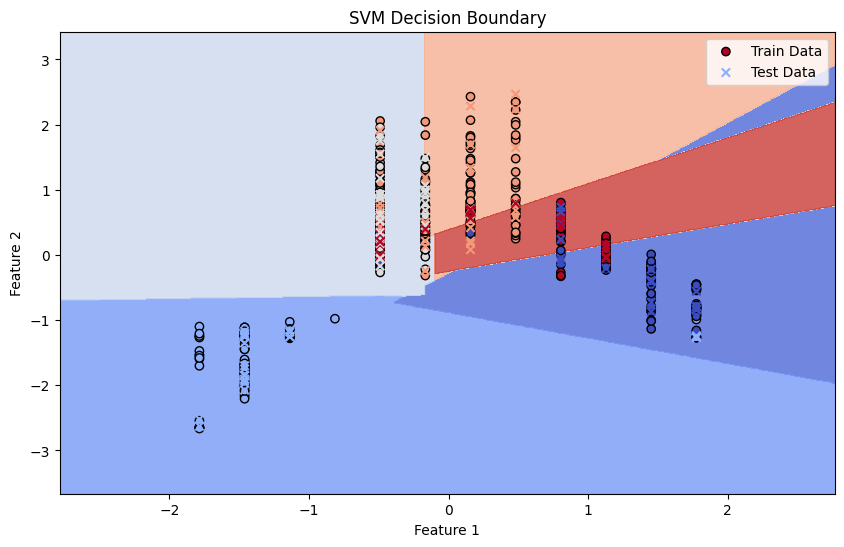

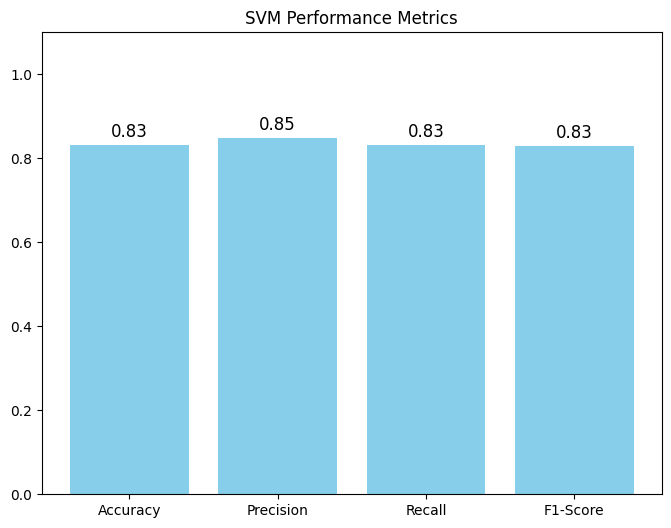

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

# Fit SVM model
modelSVM = SVC(kernel='linear', random_state=42)
modelSVM.fit(X_train, y_train3_class_labels)

# Make predictions
y_pred_svm = modelSVM.predict(X_test)

# Calculate accuracy and other metrics
accuracy_svm = accuracy_score(y_test3_class_labels, y_pred_svm)
precision_svm = precision_score(y_test3_class_labels, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test3_class_labels, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test3_class_labels, y_pred_svm, average='weighted')

print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")
print(f"SVM F1-score: {f1_svm:.2f}")
print("Classification Report:")
print(classification_report(y_test3_class_labels, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test3_class_labels, y_pred_svm))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test3_class_labels, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=modelSVM.classes_, yticklabels=modelSVM.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize SVM decision boundary for the first two features
# Reduce data to 2D for visualization
X_train_2d = X_train.iloc[:, :2].values
X_test_2d = X_test.iloc[:, :2].values

# Retrain on 2D data for visualization purposes
modelSVM_2d = SVC(kernel='linear', random_state=42)
modelSVM_2d.fit(X_train_2d, y_train3_class_labels)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict across the grid
Z = modelSVM_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train3_class_labels, cmap=plt.cm.coolwarm, edgecolors='k', label='Train Data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test3_class_labels, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test Data')
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot metrics in a bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color="skyblue")
plt.title("SVM Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train, y_train3_class_labels)

y_pred_knn = modelKNN.predict(X_test)
accuracy_knn = accuracy_score(y_test3_class_labels, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")


KNN Accuracy: 78.46%


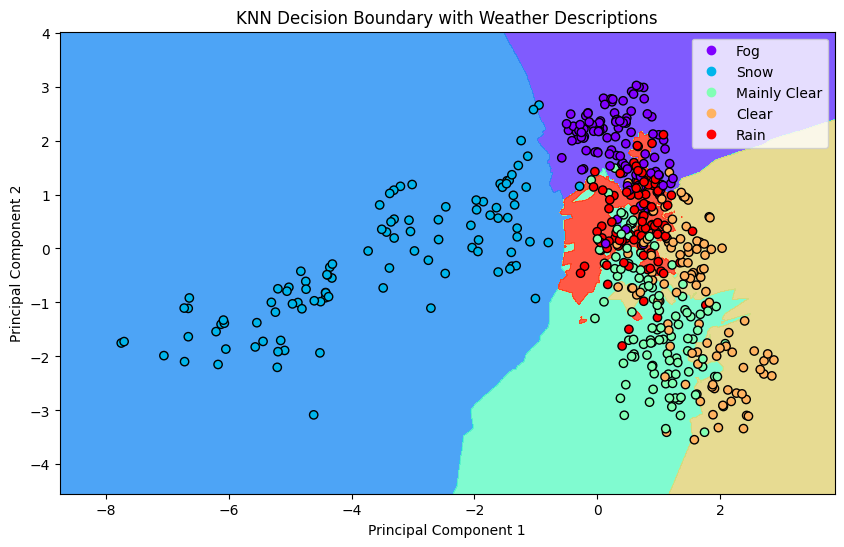

In [ ]:
# Define class descriptions
class_descriptions = {
    0: "Fog",
    1: "Snow",
    2: "Mainly Clear",
    3: "Clear",
    4: "Rain"
}

# Map numeric labels to descriptions
class_labels = [class_descriptions[label] for label in np.unique(y_train3_class_labels)]

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.rainbow)
scatter = plt.scatter(
    X_train_2D[:, 0], X_train_2D[:, 1], c=y_train3_class_labels, edgecolor="k", cmap=plt.cm.rainbow
)

# Add legend with descriptions
plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Decision Boundary with Weather Descriptions")
plt.show()


KNN Accuracy: 78.46%
KNN Precision: 0.79
KNN Recall: 0.78
KNN F1-score: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       1.00      0.92      0.96        26
           2       0.74      0.68      0.71        25
           3       0.70      0.81      0.75        26
           4       0.75      0.70      0.72        30

    accuracy                           0.78       130
   macro avg       0.79      0.79      0.79       130
weighted avg       0.79      0.78      0.79       130

Confusion Matrix:
[[19  0  0  0  4]
 [ 2 24  0  0  0]
 [ 1  0 17  6  1]
 [ 0  0  3 21  2]
 [ 3  0  3  3 21]]


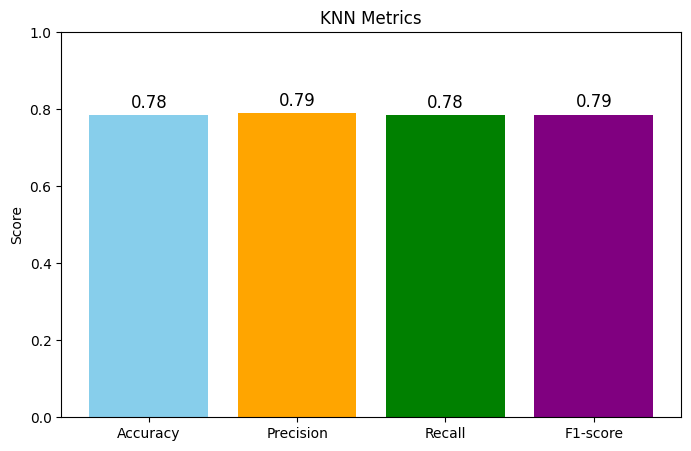

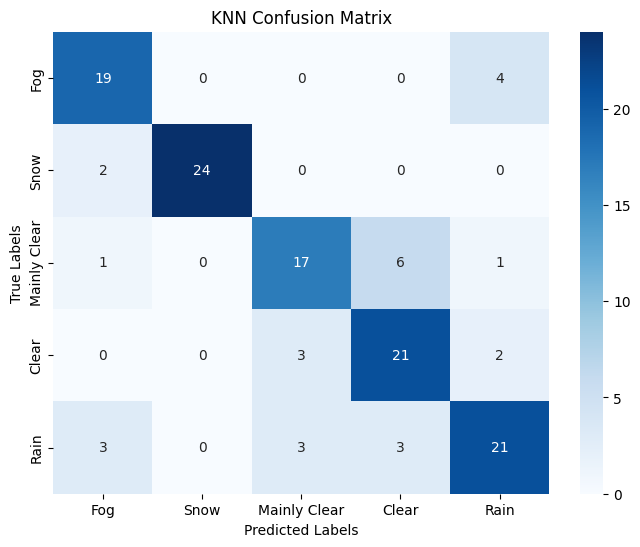

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate metrics
precision_knn = precision_score(y_test3_class_labels, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test3_class_labels, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test3_class_labels, y_pred_knn, average='weighted')

# Print metrics
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"KNN Precision: {precision_knn:.2f}")
print(f"KNN Recall: {recall_knn:.2f}")
print(f"KNN F1-score: {f1_knn:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test3_class_labels, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test3_class_labels, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Plot Metrics
metrics_knn = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1-score": f1_knn
}

# Bar Plot for Metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_knn.keys(), metrics_knn.values(), color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("KNN Metrics")
for i, v in enumerate(metrics_knn.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Heatmap for Confusion Matrix
labels = ['Fog', 'Snow', 'Mainly Clear', 'Clear', 'Rain']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **All Models Prediction**

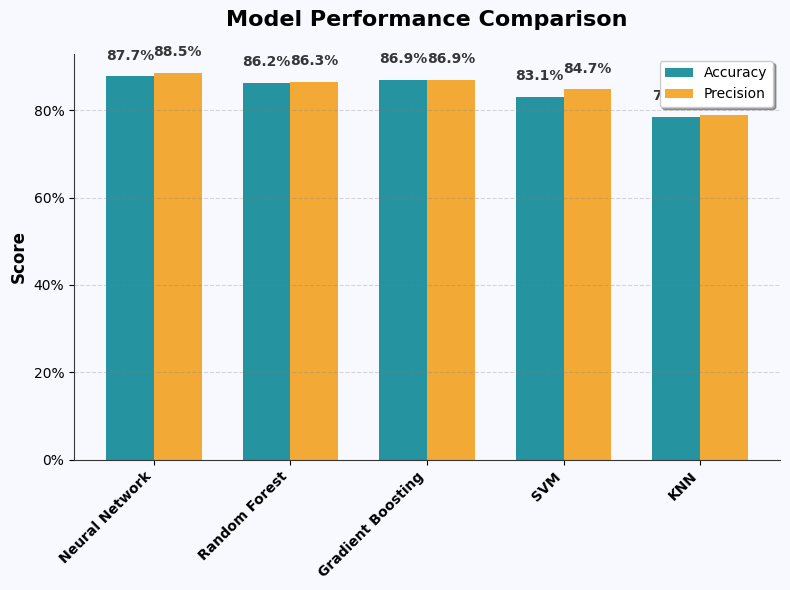


Detailed Performance Metrics:
------------------------------------------------------------
Model                  Accuracy  Precision
------------------------------------------------------------
Neural Network            0.877      0.885
Random Forest             0.862      0.863
Gradient Boosting         0.869      0.869
SVM                       0.831      0.847
KNN                       0.785      0.790
------------------------------------------------------------

Best Performers:
Best Accuracy: Neural Network (0.877)
Best Precision: Neural Network (0.885)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from matplotlib.ticker import PercentFormatter

# Set random seed for reproducibility
np.random.seed(42)

n_samples = 1000

# Calculate accuracies
accuracy3 = np.mean(y_test3_class_labels == np.argmax(y_pred_proba3, axis=1))
accuracy_rf = np.mean(y_test3_class_labels == y_pred_rf)
accuracy = np.mean(y_test3_class_labels == y_pred)
accuracy_svm = np.mean(y_test3_class_labels == y_pred_svm)
accuracy_knn = np.mean(y_test3_class_labels == y_pred_knn)

# Calculate precision for all models
precision_rf = precision_score(y_test3_class_labels, y_pred_rf, average='weighted')
precision_gbc = precision_score(y_test3_class_labels, y_pred, average='weighted')
precision_svm = precision_score(y_test3_class_labels, y_pred_svm, average='weighted')
precision_knn = precision_score(y_test3_class_labels, y_pred_knn, average='weighted')
precision_nn = precision_score(y_test3_class_labels, np.argmax(y_pred_proba3, axis=1), average='weighted')

# Create data for plotting
models = ['Neural Network', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN']
accuracies = [accuracy3, accuracy_rf, accuracy, accuracy_svm, accuracy_knn]
precisions = [precision_nn, precision_rf, precision_gbc, precision_svm, precision_knn]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))  # Change the size to make it more square
width = 0.35
x = np.arange(len(models))

bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy',
               color='#00838F', alpha=0.85)  # Deep cyan
bars2 = ax.bar(x + width/2, precisions, width, label='Precision',
               color='#F39C12', alpha=0.85)  # Orange

# Customize the plot
plt.rcParams['font.family'] = 'sans-serif'
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontweight='bold')

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Enhance legend
ax.legend(loc='upper right',
         frameon=True,
         fancybox=True,
         shadow=True,
         fontsize=10)

# Add value labels on the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1%}',  # Format as percentage
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 10),
                   textcoords="offset points",
                   ha='center',
                   va='bottom',
                   fontweight='bold',
                   color='#363636')

autolabel(bars1)
autolabel(bars2)

# Add grid with enhanced styling
plt.grid(axis='y', linestyle='--', alpha=0.3, color='gray')

# Set background color
ax.set_facecolor('#F8F8FF')  # Ghost white
fig.patch.set_facecolor('#F8F8FF')

# Add a subtle box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#363636')
ax.spines['bottom'].set_color('#363636')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print metrics table
print("\nDetailed Performance Metrics:")
print("-" * 60)
print(f"{'Model':<20} {'Accuracy':>10} {'Precision':>10}")
print("-" * 60)
for i, model in enumerate(models):
    print(f"{model:<20} {accuracies[i]:>10.3f} {precisions[i]:>10.3f}")
print("-" * 60)

# Print best performers
print("\nBest Performers:")
print(f"Best Accuracy: {models[np.argmax(accuracies)]} ({max(accuracies):.3f})")
print(f"Best Precision: {models[np.argmax(precisions)]} ({max(precisions):.3f})")


# **Predicting Temperature**

In [ ]:
df_combined.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Clear,Fog,Mostly Cloudy,Rain,Snow,Sin_Wind_Spd,Sin_Wind_chill
1,5,1,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0,0,1,0,0,0.841471,0.841471
4,5,1,4,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0,0,1,0,0,0.841471,0.841471
7,5,1,7,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,0,0,1,0,0,-0.544021,0.841471
10,5,1,10,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,0,0,1,0,0,-0.905578,0.841471
22,5,1,22,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,0,0,1,0,0,-0.961397,0.841471


In [ ]:
df_temp = df_combined.copy()
df_temp.drop(['Fog', 'Snow', 'Mostly Cloudy',  'Clear','Rain'], axis=1, inplace=True)
df_temp.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Sin_Wind_Spd,Sin_Wind_chill
1,5,1,1,8.9,-0.3,52.0,0.0,0.0,24.1,101.00,0.0,0.841471,0.841471
4,5,1,4,8.2,0.6,58.0,0.0,0.0,24.1,100.97,0.0,0.841471,0.841471
7,5,1,7,9.0,2.1,62.0,9.0,9.0,48.3,101.01,0.0,-0.544021,0.841471
10,5,1,10,13.9,1.9,44.0,19.0,23.0,48.3,101.01,0.0,-0.905578,0.841471
22,5,1,22,9.8,3.5,65.0,19.0,16.0,24.1,100.88,0.0,-0.961397,0.841471


In [ ]:
df_temp2 = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns)
df_temp.dropna()
df_temp2.head()

,Month,Day,hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Wind Chill,Sin_Wind_Spd,Sin_Wind_chill
0,-0.49004,-1.545057,-1.367586,-0.183834,-1.075303,-1.721802,-1.343313,-1.382981,0.222787,0.403199,0.332737,1.120395,0.319039
1,-0.49004,-1.545057,-0.956296,-0.268125,-0.942863,-1.377105,-1.343313,-1.382981,0.222787,0.355937,0.332737,1.120395,0.319039
2,-0.49004,-1.545057,-0.545006,-0.171792,-0.722129,-1.147307,-0.494331,-0.038218,1.641937,0.418953,0.332737,-0.753823,0.319039
3,-0.49004,-1.545057,-0.133717,0.418246,-0.751560,-2.181397,0.448982,2.053636,1.641937,0.418953,0.332737,-1.242917,0.319039
4,-0.49004,-1.545057,1.511442,-0.075459,-0.516111,-0.974959,0.448982,1.007709,0.222787,0.214150,0.332737,-1.318426,0.319039


In [ ]:
X_temp = df_temp2.drop('Temp (°C)', axis=1)
y_temp = df_temp2['Temp (°C)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# **Predicting Temp using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

KNN_temp = KNeighborsRegressor(n_neighbors=5)
KNN_temp.fit(X_train, y_train)

y_pred_knn_temp = KNN_temp.predict(X_test)
mse = mean_squared_error(y_test, y_pred_knn_temp)
r2 = r2_score(y_test, y_pred_knn_temp)

print(f"KNN MSE: {mse:.2f}")
print(f"KNN R-squared: {r2:.2f}")

KNN MSE: 0.08
KNN R-squared: 0.92


KNN MSE: 0.07
KNN R-squared: 0.59


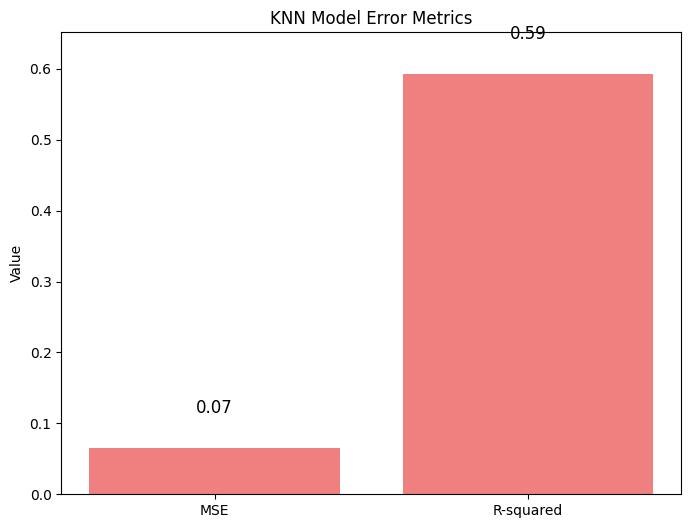

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Train the KNeighborsRegressor model
KNN_temp = KNeighborsRegressor(n_neighbors=5)
KNN_temp.fit(X_train, y_train)

# Make predictions
y_pred_knn_temp = KNN_temp.predict(X_test)

# Calculate and print metrics
mse_knn = mean_squared_error(y_test, y_pred_knn_temp)
r2_knn = r2_score(y_test, y_pred_knn_temp)

print(f"KNN MSE: {mse_knn:.2f}")
print(f"KNN R-squared: {r2_knn:.2f}")



# Plotting KNN Error Metrics
metrics = ["MSE", "R-squared"]
values = [mse_knn, r2_knn]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color="lightcoral")
plt.title("KNN Model Error Metrics")
plt.ylabel('Value')
plt.ylim(0, max(values) * 1.1)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=12)
plt.show()


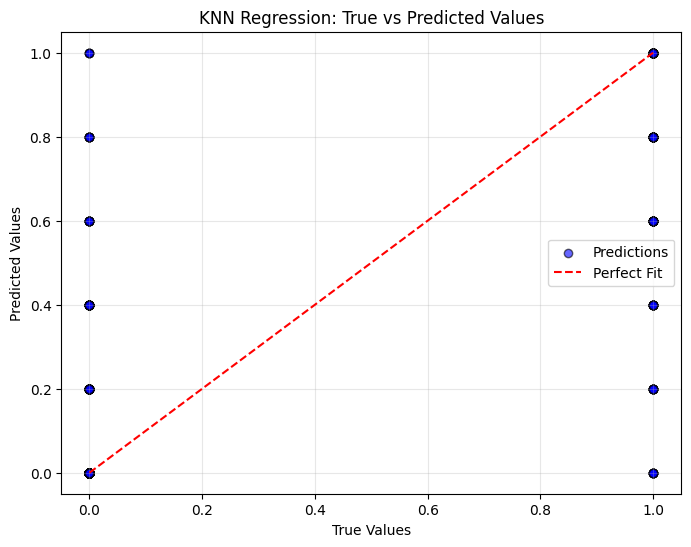

In [ ]:
import matplotlib.pyplot as plt

# Convert y_test and y_pred_knn_temp to NumPy arrays if they are pandas Series
y_test_values = y_test.values if hasattr(y_test, "values") else y_test
y_pred_values = y_pred_knn_temp.values if hasattr(y_pred_knn_temp, "values") else y_pred_knn_temp

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_values, y_pred_values, color='blue', edgecolor='k', alpha=0.6, label='Predictions')

# Add a reference line (y = x)
min_val = min(y_test_values.min(), y_pred_values.min())
max_val = max(y_test_values.max(), y_pred_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

# Add labels, title, and legend
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: True vs Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor

rf_temp = RandomForestRegressor(n_estimators=45, random_state=42)
rf_temp.fit(X_train, y_train)

y_pred_rf_temp = rf_temp.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf_temp)
r2rf = r2_score(y_test, y_pred_rf_temp)
print(f"MSE: {mse:.2f}")

print(f"R-squared: {r2rf:.2f}")

MSE: 0.01
R-squared: 0.99


MSE: 0.04
R-squared: 0.76
MAE: 0.08


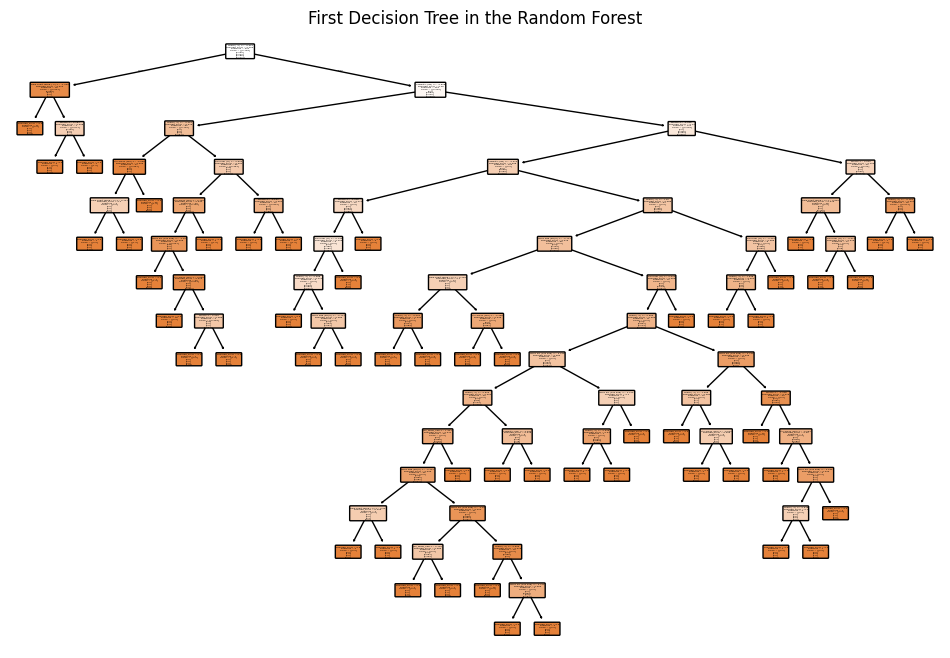

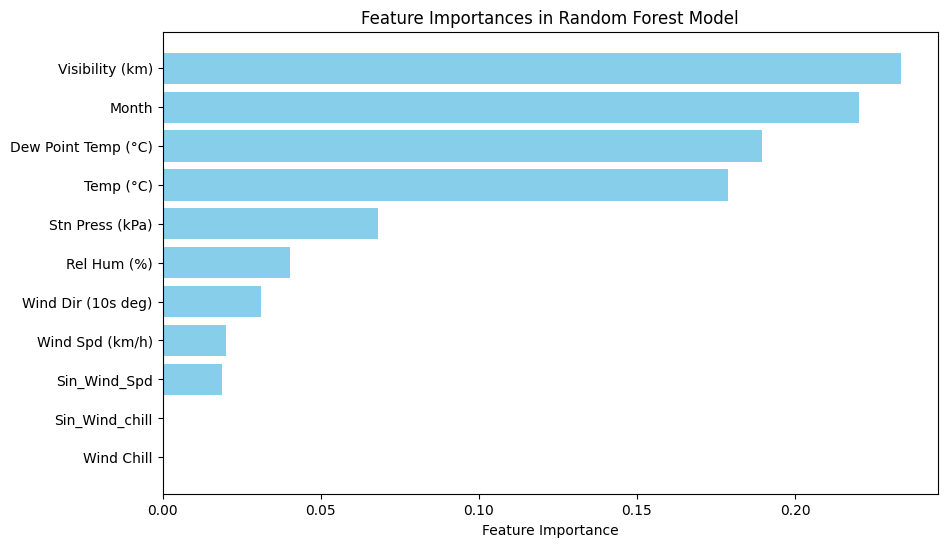

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Assuming you have already defined X_train, y_train, X_test, y_test
# Train the RandomForestRegressor
rf_temp = RandomForestRegressor(n_estimators=45, random_state=42)
rf_temp.fit(X_train, y_train)

# Make predictions
y_pred_rf_temp = rf_temp.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred_rf_temp)
r2rf = r2_score(y_test, y_pred_rf_temp)
mae = mean_absolute_error(y_test, y_pred_rf_temp)

print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2rf:.2f}")
print(f"MAE: {mae:.2f}")

# Plot a single decision tree in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_temp.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True)
plt.title("First Decision Tree in the Random Forest")
plt.show()

# Plot the feature importances from the Random Forest
feature_importances = rf_temp.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(np.array(X_train.columns)[indices], feature_importances[indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Random Forest Model")
plt.show()

